# All imports

In [1]:
import numpy as np
import functools

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Mathsy Aux Functions

In [2]:
# Returns the probability of n theta bernoulli variables getting r positives multiplied by 
def bernoulli_prob(n,r,theta):
    theta *= 1.
    return (theta**r) * (1-theta)**(n-r)

# Scales a vector to have L1 length equal to 1
def normalize_vector(vect):
    return np.divide(vect,sum(vect))

# pdfs Aux Functions

In [3]:
# Returns a pdf from a number of observations and number of transactions, assuming a initial uniform pdf
# TODO: If n is too big the probabilities get set to zero due to floating point errors
# TODO: Need to start using BigInt types or find another way around this
def generate_pdf(n,r,bins=10**4):
    # n : number of observations
    # r : number of positives
    # bins : number of points in the x coordinate to be generated
    x_coordinate = np.linspace(0,1,bins+1)
    f = functools.partial(bernoulli_prob,n,r)
    y_coordinate = list(map(f,x_coordinate))
    # TODO: Find a better way to normalize a vector
    y_coordinate = np.multiply(y_coordinate,(bins*1./sum(y_coordinate)))
    return y_coordinate

# Updates the confidence interval based on the original pdf
def bayesian_update(original_pdf,update_factor, bins):
    assert len(original_pdf) == bins
    assert len(update_factor) == bins
    updated_pdf = np.multiply(original_pdf,update_factor)
    # TODO: Find a better way to normalize a vector
    updated_pdf = np.multiply(updated_pdf,bins*1./sum(updated_pdf))
    return updated_pdf

# Plot Aux Functions

In [4]:
# Compares the plots given arrays of equal length
def plot_pdfs(distributions,bins=1000,fig_width=20,fig_height=3):
    plt.rcParams["figure.figsize"] = [fig_width,fig_height]
    patches = []
    for distribution,color,name in distributions:
        y_coordinate = distribution
        x_coordinate = np.linspace(0,1,len(y_coordinate))
        plt.plot(x_coordinate,y_coordinate,color)
        patches.append(mpatches.Patch(color=color, label=name))
    plt.legend(handles=patches)
    plt.ylabel('probabiity density function')
    plt.show()

# Main

In [5]:
obs = [(10,2,'g','alternative_1'),(100,3,'b','alternative_2'),(100,4,'r','control')]
def f(a):
    return (generate_pdf(a[0],a[1]),a[2],a[3])
obs = list(map(f,obs))

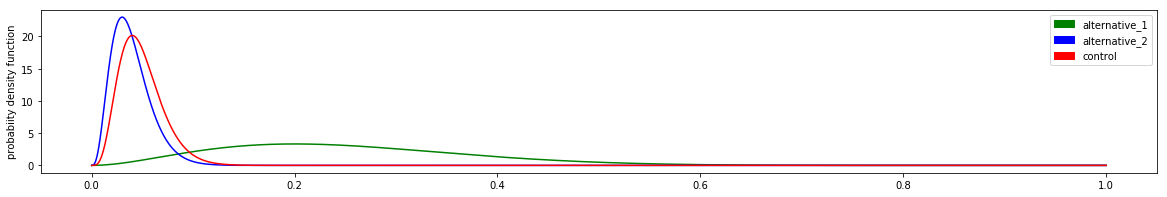

In [6]:
plot_pdfs(obs)